# Data

In [4]:
import pickle
import pandas as pd
from collections import Counter

with open('../models/single_layer_biLSTM/data_container_30msl.generator.pkl', 'rb') as fi:
    data = pickle.load(fi)

In [5]:
data.display_metadata()


--DATASET METADATA --
description: None
embedding_dims: 50
max_elements: 3
max_index: 20310
max_num_questions: 1
max_seq_length: 30
vocab_size: 20311


In [12]:
[x for x in dir(data) if not x.startswith('__')]

['_create_test_set_',
 'description_meta',
 'display_metadata',
 'embedding_dims_meta',
 'index2word',
 'max_elements_meta',
 'max_index_meta',
 'max_num_questions_meta',
 'max_seq_length_meta',
 'non_questions',
 'questions',
 'randomize_num_questions',
 'show_random_sample_of_data',
 'test_features',
 'test_labels',
 'vectors',
 'vocab',
 'vocab_size_meta',
 'word2index']

In [13]:
data.show_random_sample_of_data(2, words=True, mini=False)

TypeError: show_random_sample_of_data() got an unexpected keyword argument 'words'

## vocab analysis

In [14]:
vocab = " ".join([" ".join(data.questions), " ".join(data.non_questions)])

In [15]:
from collections import Counter

In [16]:
word_count = Counter(list(vocab.split()))

In [17]:
words = [x[0] for x in word_count.most_common()]
counts = [x[1] for x in word_count.most_common()]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams


Text(0.5,1,'Frequency of words, ordered from most frequent to least frequent')

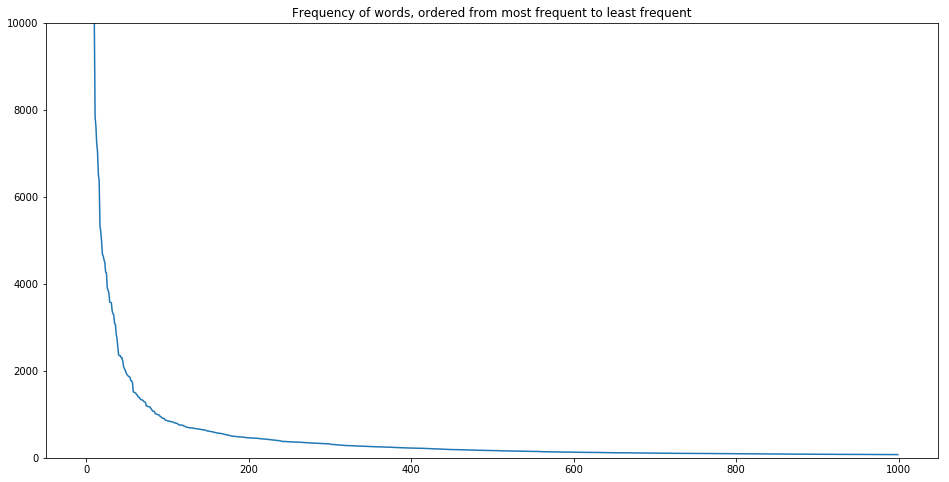

In [22]:
_, ax = plt.subplots(figsize=(16, 8))
plt.plot([x[0] for x in enumerate(words[:1000])], counts[:1000]);
plt.ylim((0, 10000));
plt.title("Frequency of words, ordered from most frequent to least frequent")

#### Analyze Generator behavior

In [ ]:
import pickle
import pandas as pd
import numpy as np
from collections import Counter

with open('../models/vanilla/data_container_30msl.generator.pkl', 'rb') as fi:
    data = pickle.load(fi)

#### Check Outputs

In [ ]:
from backend.preprocess import GeneratorInputFn
from backend.container import Appender_

In [ ]:
kwargs = {
    'questions': data.questions,
    'non_questions': data.non_questions,
    'word2index':  data.word2index,
    'max_seq_length':  30,
    'max_num_questions':  1,
    'max_num_elements':  3,
    'randomize_num_questions': False
 }

In [ ]:
gen = GeneratorInputFn().generate(**kwargs)
app = Appender_()

#### Test generator outputs

In [ ]:
dat = list()
for i in range(500):

    feat, lab = next(gen)
    dat.append(feat[1])
    print(feat[0])
#     break
    
#     feature = len(feat[0]), len(feat[1]), len(feat[2]), len(feat[3])
#     label = len(lab[0]), len(lab[1]), len(lab[2])
#     app.append(feature, label)
print(max(dat))
# feature_counts, label_counts = app.export_data()

In [ ]:
# len(data.test_features[1])
print(max(data.test_features[1]))


#### Test Generator v2  - multiprocessing addon

In [10]:
import pickle
import pandas as pd
import numpy as np
from collections import Counter
from multiprocessing import Process, Queue
from time import sleep
from backend.preprocess import GeneratorInputV2
from backend.utils import convert_int2word

In [11]:
with open('../models/vanilla_single_layer_enc/data_container_30msl.generator.pkl', 'rb') as fi:
    data = pickle.load(fi)

In [12]:
kwargs = {
    'questions': data.questions,
    'non_questions': data.non_questions,
    'Q_size': 100,
    'num_proc': 2,
    'word2index':  data.word2index,
    'max_seq_length':  30,
    'max_num_questions':  1,
    'max_num_elements':  3,
    'randomize_num_questions': False
 }

In [13]:
gen_obj = GeneratorInputV2(**kwargs)  # This should take max a few seconds to prefill the queue

Initializing generator
Process started
Queues initializing...3 of 100
Queues initializing...63 of 100


In [14]:
print(gen_obj.feature_que.full())
print(gen_obj.queues_length)

True
0


In [15]:
generator = gen_obj.from_queue_generator()

In [19]:
for _ in range(10):
    x, y = next(generator)
    print()
    print('input: {}'.format(" ".join(convert_int2word(data.index2word, x[0]))))
    print("target: {}".format(" ".join(convert_int2word(data.index2word, y[0]))))
    print()


input: no no just the left side does she mean when we have evolved into the borg godel heinsberg kant mind blown thanks for your answer
target: does she mean when we have evolved into the borg


input: zizek against the double blackmail is are there a civic religions in western europe brains are easy compared to minds
target: is are there a civic religions in western europe


input: <UNK> thank you is that a fair interpretation of your answer for the record im not the <UNK>
target: is that a fair interpretation of your answer


input: what kind of police officer desk officers trainers yeah and definitely philosophy isnt a programming language let us continue this discussion in <UNK>
target: what kind of police officer desk officers trainers


input: apologies if too broad any tips totally welcome this is the form of the argument either p or q is it really about ethics
target: is it really about ethics


input: if he has an answer see this <UNK> for some details regarding <UNK> visit t